<a href="https://colab.research.google.com/github/ojaswichoudhary/sentiment-analysis/blob/main/Sentiment_Analysis_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence


In [2]:
max_features = 10000  # top 10,000 words
max_len = 200         # cut reviews after 200 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Embedding(max_features, 128),
    layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 219s 683ms/step - accuracy: 0.6990 - loss: 0.5583 - val_accuracy: 0.7568 - val_loss: 0.5031
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 216s 691ms/step - accuracy: 0.8364 - loss: 0.3868 - val_accuracy: 0.6508 - val_loss: 0.6272
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 265s 700ms/step - accuracy: 0.7282 - loss: 0.5315 - val_accuracy: 0.7222 - val_loss: 0.5324


In [5]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7290 - loss: 0.5312
Test Accuracy: 73.12%


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB word index
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def encode_text(text):
    tokens = text.lower().split()
    encoded = [word_index.get(word, 2) for word in tokens]  # 2 = unknown
    return pad_sequences([encoded], maxlen=max_len)

sample_review = "The movie was fantastic! The acting was great and the story was very touching."
prediction = model.predict(encode_text(sample_review))
print("Positive" if prediction[0][0] > 0.5 else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Positive


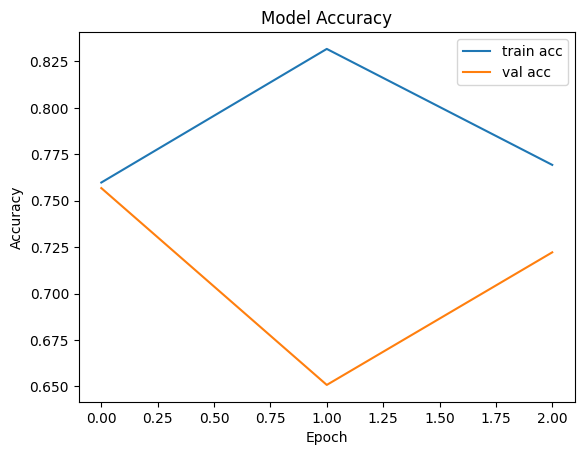

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
